# 05/10


調整參數：word embedding dimension, LSTM layer's output dimension.

結果：Model 2 表現最好：

word imbedding dimension: 256

LSTM dimension: 256

Model 2 的表現：

accuracy: 0.8622653448639528

precision: [0.666666 0.707070 0.944131 0.819444 0.758321 0.705882 1]

recall: [0.777777 0.608695 0.92929  0.856624 0.723756 0.666666 1 ]

F1 score: [0.717948 0.654205 0.93665  0.837622 0.740636 0.685714 1 ]

# Import packages and Datasets

In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import gc #Garbage Collector interface
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score #The F-Measure is a popular metric for imbalanced classification.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# import Google Drive 套件
from google.colab import drive

# 將自己的雲端硬碟掛載上去
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# 透過 gdrive/My Drive/... 來存取檔案
data_df = pd.read_excel('gdrive/My Drive/金融科技Final_project/ckiptagger_data.xlsx')

In [4]:
data_df.head()

,個股代號,公司簡稱,事件日,TCRI(年/月),事件強度,大事件類別,小事件類別,事件內容,content_tokenized
0,1218,泰山,20190101,6(2018/09),0,M_經營層,MT06_高管異動,發言人林俐婉內部調動由江巍峰接任,發言人 林俐婉 內部 調動 由 江巍峰 接任
1,1503,士電,20190101,4(2018/09),0,M_經營層,MT06_高管異動,內部稽核主管林志強內部調動由莊文清接任,內部 稽核 主管 林志強 內部 調動 由 莊文清 接任
2,1504,東元,20190101,4(2018/09),0,M_經營層,MT06_高管異動,會計主管藍俊雄內部調動由林鴻名接任,會計 主管 藍俊雄 內部 調動 由 林鴻名 接任
3,1709,和益,20190101,5(2018/09),0,M_經營層,MT06_高管異動,內部稽核主管游本詮內部調動由曾筱茜接任,內部 稽核 主管 游本詮 內部 調動 由 曾筱茜 接任
4,1721,三晃,20190101,7(2018/09),0,M_經營層,MT06_高管異動,財務經理洪廷宜內部調動由王婷渝接任,財務 經理 洪廷宜 內部 調動 由 王婷渝 接任


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23703 entries, 0 to 23702
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   個股代號               23703 non-null  int64 
 1   公司簡稱               22775 non-null  object
 2   事件日                23703 non-null  int64 
 3   TCRI(年/月)          23703 non-null  object
 4   事件強度               23703 non-null  int64 
 5   大事件類別              23703 non-null  object
 6   小事件類別              23703 non-null  object
 7   事件內容               23703 non-null  object
 8   content_tokenized  23703 non-null  object
dtypes: int64(3), object(6)
memory usage: 1.6+ MB


# Data preprocessing

In [6]:
import keras
MAX_NUM_WORDS = 10000
tokenizer = keras .preprocessing.text.Tokenizer(num_words=MAX_NUM_WORDS)

corpus = data_df.content_tokenized

Using TensorFlow backend.


In [7]:
corpus

0                                   發言人 林俐婉 內部 調動 由 江巍峰 接任
1                              內部 稽核 主管 林志強 內部 調動 由 莊文清 接任
2                                 會計 主管 藍俊雄 內部 調動 由 林鴻名 接任
3                              內部 稽核 主管 游本詮 內部 調動 由 曾筱茜 接任
4                                 財務 經理 洪廷宜 內部 調動 由 王婷渝 接任
                               ...                        
23698    2018年 09月 累計 營收 1496639千 元 年增 1622018年 09月 單月 ...
23699                       20191231 收盤價 3500 元 月 報酬 下跌 43
23700    世界 先進 評估 跨足 晶圓 薄化 領域 搶進 晶圓 薄化 市場 機率 高晶圓 薄化 是 晶...
23701    1 雷虎 科技 與 香港 中澤 文化 投資 股份 有限公司 仲裁 案號 補充 公告 雷虎 科...
23702    商億 KY 公告 董事會 為 配合 柬埔寨 孫 公司 發展 需求 擬 透過 子公司 Shay...
Name: content_tokenized, Length: 23703, dtype: object

In [8]:
tokenizer.fit_on_texts(corpus)

x = tokenizer.texts_to_sequences(corpus)

len(x)

x[:1]

for seq in x[:1]:
    print([tokenizer.index_word[idx] for idx in seq])
    
for seq in x[:20]:
    print(len(seq), seq[:5], ' ...')
    
max_seq_len = max([
    len(seq) for seq in x])

max_seq_len

MAX_SEQUENCE_LENGTH = 1000

['發言人', '內部', '調動', '由', '接任']
5 [405, 68, 128, 23, 76]  ...
7 [68, 358, 133, 68, 128]  ...
6 [292, 133, 68, 128, 23]  ...
7 [68, 358, 133, 68, 128]  ...
6 [94, 426, 68, 128, 23]  ...
6 [239, 133, 68, 128, 23]  ...
8 [217, 196, 23, 76, 405]  ...
13 [422, 24, 63, 6, 4874]  ...
6 [504, 24, 63, 50, 6]  ...
5 [217, 68, 128, 23, 76]  ...
5 [217, 68, 128, 23, 76]  ...
196 [2790, 760, 2040, 1228, 21]  ...
17 [422, 24, 63, 6, 6512]  ...
6 [292, 133, 68, 128, 23]  ...
6 [94, 426, 68, 128, 23]  ...
6 [292, 133, 68, 128, 23]  ...
5 [217, 68, 128, 23, 76]  ...
7 [239, 133, 68, 128, 23]  ...
5 [217, 68, 128, 23, 76]  ...
5 [217, 68, 128, 23, 76]  ...


In [0]:
x = keras .preprocessing .sequence .pad_sequences(x, maxlen=MAX_SEQUENCE_LENGTH)

# Model building: Predict intensity

In [0]:
y = data_df["事件強度"]

## Split data into training dataset and testing dataset

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Check the distribution of target variable in both training dataset and testing dataset.

In [12]:
y_train.value_counts()

-1    8557
 0    6722
 1    2807
-2     521
-3     219
 2      76
 3      60
Name: 事件強度, dtype: int64

In [13]:
y_test.value_counts()

-1    2164
 0    1653
 1     724
-2     115
-3      54
 2      18
 3      13
Name: 事件強度, dtype: int64

## Encode target variable

In [0]:
enc = OneHotEncoder(sparse=False)
y_train = enc.fit_transform(np.asarray(y_train).reshape(-1, 1))
y_test = enc.transform(np.asarray(y_test).reshape(-1, 1))

## Oversampleing

In [15]:
# Oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# Model 1 

word imbedding dimension: 256

LSTM dimension: 128

In [0]:
# Build our neural network model with LSTM

from keras import models
from keras import layers

max_features = 25000

from keras.layers import LSTM
model = models.Sequential()
model.add(layers.Embedding(max_features, 256))
model.add(layers.LSTM(128))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Iterate on your training data by calling the fit() method of your model
history = model.fit(X_train_res, y_train_res,
                    epochs=20,
                    batch_size=500,
                   validation_split=0.2)

# plot the results of loss values from the training set and validtion set
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.figure(figsize=(10,6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# plot the results of accuracy from the training set and validtion set
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Performance on training set

In [17]:
preds_Y_train = model.predict(X_train)
preds_Y_train =(preds_Y_train>0.5).astype(int)

preds_Y_train = enc.inverse_transform(preds_Y_train)
y_train = enc.inverse_transform(y_train)

accuracy = accuracy_score(y_train, preds_Y_train)
precision = precision_score(y_train, preds_Y_train,average=None) # average=None: The precision scores for each class are returned
recall = recall_score(y_train, preds_Y_train,average=None)
f1 = f1_score(y_train, preds_Y_train,average=None)
c_matrix = confusion_matrix(y_train, preds_Y_train,labels=[-3,-2,-1,0,1,2,3])
print('accuracy: '+str(accuracy)+'\n')
print('precision: '+str(precision)+'\n')
print('recall: '+str(recall)+'\n')
print('F1 score: '+str(f1)+'\n')
print('Confusion matrix: ')
print(c_matrix)

accuracy: 0.9928277607847273

precision: [0.95633188 0.98484848 0.99659664 0.99092802 0.99043571 0.98701299
 1.        ]

recall: [1.         0.99808061 0.99240388 0.99122285 0.99608123 1.
 1.        ]

F1 score: [0.97767857 0.9914204  0.99449584 0.99107541 0.99325044 0.99346405
 1.        ]

Confusion matrix: 
[[ 219    0    0    0    0    0    0]
 [   0  520    1    0    0    0    0]
 [   3    5 8492   51    5    1    0]
 [   6    3   28 6663   22    0    0]
 [   1    0    0   10 2796    0    0]
 [   0    0    0    0    0   76    0]
 [   0    0    0    0    0    0   60]]


## Performance on testing set

In [18]:
preds_Y_test = model.predict(X_test)
preds_Y_test =(preds_Y_test>0.5).astype(int)

preds_Y_test = enc.inverse_transform(preds_Y_test)
y_test = enc.inverse_transform(y_test)

accuracy = accuracy_score(y_test, preds_Y_test)
precision = precision_score(y_test, preds_Y_test,average=None) # average=None: The precision scores for each class are returned
recall = recall_score(y_test, preds_Y_test,average=None)
f1 = f1_score(y_test, preds_Y_test,average=None)
c_matrix = confusion_matrix(y_test, preds_Y_test,labels=[-3,-2,-1,0,1,2,3])
print('accuracy: '+str(accuracy)+'\n')
print('precision: '+str(precision)+'\n')
print('recall: '+str(recall)+'\n')
print('F1 score: '+str(f1)+'\n')
print('Confusion matrix: ')
print(c_matrix)

accuracy: 0.8618434929339802

precision: [0.49425287 0.63716814 0.93866171 0.83690476 0.77013177 0.53846154
 0.92307692]

recall: [0.7962963  0.62608696 0.93345656 0.85057471 0.72651934 0.38888889
 0.92307692]

F1 score: [0.60992908 0.63157895 0.9360519  0.84368437 0.74769012 0.4516129
 0.92307692]

Confusion matrix: 
[[  43    4    4    3    0    0    0]
 [  10   72   23    9    1    0    0]
 [   8   15 2020   89   29    3    0]
 [  21   13   85 1406  127    0    1]
 [   4    6   17  169  526    2    0]
 [   1    3    3    4    0    7    0]
 [   0    0    0    0    0    1   12]]


# Model 2 :

word imbedding dimension: 256

LSTM dimension: 256

In [0]:
y = data_df["事件強度"]

# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Encoding
enc = OneHotEncoder(sparse=False)
y_train = enc.fit_transform(np.asarray(y_train).reshape(-1, 1))
y_test = enc.transform(np.asarray(y_test).reshape(-1, 1))

# Oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 47919 samples, validate on 11980 samples
Epoch 1/20
47919/47919 [==============================] - 274s 6ms/step - loss: 0.6763 - accuracy: 0.7758 - val_loss: 2.3836 - val_accuracy: 0.2907
Epoch 2/20
47919/47919 [==============================] - 264s 6ms/step - loss: 0.1399 - accuracy: 0.9516 - val_loss: 1.3483 - val_accuracy: 0.3954
Epoch 3/20
47919/47919 [==============================] - 264s 6ms/step - loss: 0.0875 - accuracy: 0.9722 - val_loss: 1.0144 - val_accuracy: 0.6743
Epoch 4/20
47919/47919 [==============================] - 264s 6ms/step - loss: 0.0610 - accuracy: 0.9821 - val_loss: 0.8274 - val_accuracy: 0.8837
Epoch 5/20
47919/47919 [==============================] - 264s 6ms/step - loss: 0.0376 - accuracy: 0.9890 - val_loss: 0.6001 - val_accuracy: 0.9172
Epoch 6/20
47919/47919 [==============================] - 263s 5ms/step - loss: 0.0284 - accuracy: 0.9915 - val_loss: 0.2707 - val_accuracy: 0.9296
Epoch 7/20
47919/47919 [==============================] - 263s

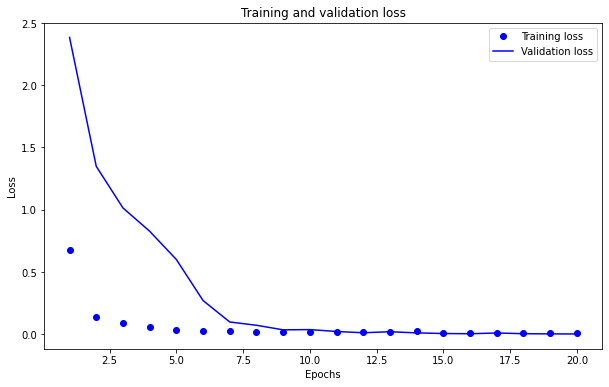

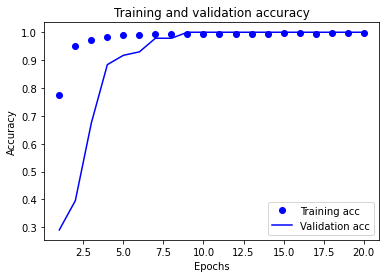

In [0]:
# Build our neural network model with LSTM

from keras import models
from keras import layers

max_features = 25000

from keras.layers import LSTM
model = models.Sequential()
model.add(layers.Embedding(max_features, 256))
model.add(layers.LSTM(256))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Iterate on your training data by calling the fit() method of your model
history = model.fit(X_train_res, y_train_res,
                    epochs=20,
                    batch_size=500,
                   validation_split=0.2)

# plot the results of loss values from the training set and validtion set
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.figure(figsize=(10,6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# plot the results of accuracy from the training set and validtion set
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Performance on training set

In [0]:
preds_Y_train = model.predict(X_train)
preds_Y_train =(preds_Y_train>0.5).astype(int)

preds_Y_train = enc.inverse_transform(preds_Y_train)
y_train = enc.inverse_transform(y_train)

accuracy = accuracy_score(y_train, preds_Y_train)
precision = precision_score(y_train, preds_Y_train,average=None) # average=None: The precision scores for each class are returned
recall = recall_score(y_train, preds_Y_train,average=None)
f1 = f1_score(y_train, preds_Y_train,average=None)
c_matrix = confusion_matrix(y_train, preds_Y_train,labels=[-3,-2,-1,0,1,2,3])
print('accuracy: '+str(accuracy)+'\n')
print('precision: '+str(precision)+'\n')
print('recall: '+str(recall)+'\n')
print('F1 score: '+str(f1)+'\n')
print('Confusion matrix: ')
print(c_matrix)

accuracy: 0.9932496572091551

precision: [0.98206278 0.9886148  0.99823446 0.98846495 0.9914803  0.98701299
 1.        ]

recall: [1.         1.         0.99111838 0.99434692 0.99501247 1.
 1.        ]

F1 score: [0.99095023 0.99427481 0.9946637  0.99139721 0.99324324 0.99346405
 1.        ]

Confusion matrix: 
[[ 219    0    0    0    0    0    0]
 [   0  521    0    0    0    0    0]
 [   3    3 8481   64    5    1    0]
 [   1    3   15 6684   19    0    0]
 [   0    0    0   14 2793    0    0]
 [   0    0    0    0    0   76    0]
 [   0    0    0    0    0    0   60]]


## Performance on testing set

In [0]:
preds_Y_test = model.predict(X_test)
preds_Y_test =(preds_Y_test>0.5).astype(int)

preds_Y_test = enc.inverse_transform(preds_Y_test)
y_test = enc.inverse_transform(y_test)

accuracy = accuracy_score(y_test, preds_Y_test)
precision = precision_score(y_test, preds_Y_test,average=None) # average=None: The precision scores for each class are returned
recall = recall_score(y_test, preds_Y_test,average=None)
f1 = f1_score(y_test, preds_Y_test,average=None)
c_matrix = confusion_matrix(y_test, preds_Y_test,labels=[-3,-2,-1,0,1,2,3])
print('accuracy: '+str(accuracy)+'\n')
print('precision: '+str(precision)+'\n')
print('recall: '+str(recall)+'\n')
print('F1 score: '+str(f1)+'\n')
print('Confusion matrix: ')
print(c_matrix)

accuracy: 0.8622653448639528

precision: [0.66666667 0.70707071 0.94413146 0.81944444 0.75832127 0.70588235
 1.        ]

recall: [0.77777778 0.60869565 0.9292976  0.85662432 0.72375691 0.66666667
 1.        ]

F1 score: [0.71794872 0.65420561 0.9366558  0.83762201 0.74063604 0.68571429
 1.        ]

Confusion matrix: 
[[  42    3    5    4    0    0    0]
 [   4   70   24   16    1    0    0]
 [   8   11 2011  109   23    2    0]
 [   8    9   80 1416  140    0    0]
 [   1    5    9  182  524    3    0]
 [   0    1    1    1    3   12    0]
 [   0    0    0    0    0    0   13]]


# Model 3 :

word imbedding dimension: 512

LSTM dimension: 256

In [10]:
y = data_df["事件強度"]

# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Encoding
enc = OneHotEncoder(sparse=False)
y_train = enc.fit_transform(np.asarray(y_train).reshape(-1, 1))
y_test = enc.transform(np.asarray(y_test).reshape(-1, 1))

# Oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 47919 samples, validate on 11980 samples
Epoch 1/20
47919/47919 [==============================] - 338s 7ms/step - loss: 0.4226 - accuracy: 0.8536 - val_loss: 1.3607 - val_accuracy: 0.3941
Epoch 2/20
47919/47919 [==============================] - 349s 7ms/step - loss: 0.1208 - accuracy: 0.9586 - val_loss: 0.5405 - val_accuracy: 0.8830
Epoch 3/20
47919/47919 [==============================] - 347s 7ms/step - loss: 0.0690 - accuracy: 0.9782 - val_loss: 0.2707 - val_accuracy: 0.9172
Epoch 4/20
47919/47919 [==============================] - 339s 7ms/step - loss: 0.0424 - accuracy: 0.9864 - val_loss: 0.0431 - val_accuracy: 0.9785
Epoch 5/20
47919/47919 [==============================] - 349s 7ms/step - loss: 0.0294 - accuracy: 0.9915 - val_loss: 0.0114 - val_accuracy: 1.0000
Epoch 6/20
47919/47919 [==============================] - 352s 7ms/step - loss: 0.0230 - accuracy: 0.9931 - val_loss: 0.0102 - val_accuracy: 1.0000
Epoch 7/20
47919/47919 [==============================] - 354s

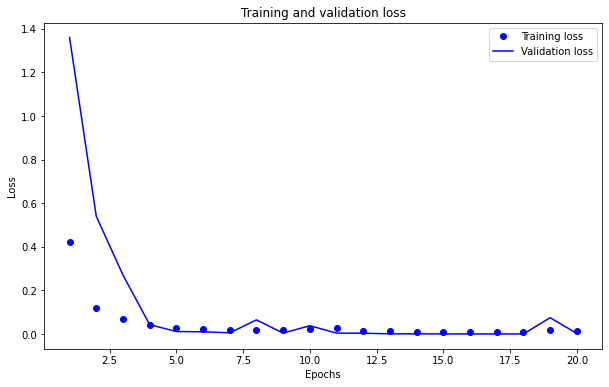

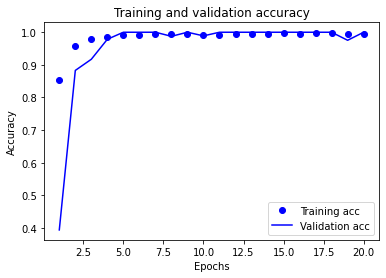

In [11]:
# Build our neural network model with LSTM

from keras import models
from keras import layers

max_features = 25000

from keras.layers import LSTM
model = models.Sequential()
model.add(layers.Embedding(max_features, 512))
model.add(layers.LSTM(256))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Iterate on your training data by calling the fit() method of your model
history = model.fit(X_train_res, y_train_res,
                    epochs=20,
                    batch_size=250,
                   validation_split=0.2)

# plot the results of loss values from the training set and validtion set
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.figure(figsize=(10,6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# plot the results of accuracy from the training set and validtion set
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Performance on training set

In [12]:
preds_Y_train = model.predict(X_train)
preds_Y_train =(preds_Y_train>0.5).astype(int)

preds_Y_train = enc.inverse_transform(preds_Y_train)
y_train = enc.inverse_transform(y_train)

accuracy = accuracy_score(y_train, preds_Y_train)
precision = precision_score(y_train, preds_Y_train,average=None) # average=None: The precision scores for each class are returned
recall = recall_score(y_train, preds_Y_train,average=None)
f1 = f1_score(y_train, preds_Y_train,average=None)
c_matrix = confusion_matrix(y_train, preds_Y_train,labels=[-3,-2,-1,0,1,2,3])
print('accuracy: '+str(accuracy)+'\n')
print('precision: '+str(precision)+'\n')
print('recall: '+str(recall)+'\n')
print('F1 score: '+str(f1)+'\n')
print('Confusion matrix: ')
print(c_matrix)

accuracy: 0.9923531273072461

precision: [0.99545455 0.97932331 0.99917385 0.98785905 0.98489108 0.98701299
 1.        ]

recall: [1.         1.         0.98936543 0.99256174 0.99857499 1.
 1.        ]

F1 score: [0.9977221  0.98955366 0.99424545 0.99020481 0.99168583 0.99346405
 1.        ]

Confusion matrix: 
[[ 219    0    0    0    0    0    0]
 [   0  521    0    0    0    0    0]
 [   1    5 8466   79    5    1    0]
 [   0    6    6 6672   38    0    0]
 [   0    0    1    3 2803    0    0]
 [   0    0    0    0    0   76    0]
 [   0    0    0    0    0    0   60]]


## Performance on testing set

In [13]:
preds_Y_test = model.predict(X_test)
preds_Y_test =(preds_Y_test>0.5).astype(int)

preds_Y_test = enc.inverse_transform(preds_Y_test)
y_test = enc.inverse_transform(y_test)

accuracy = accuracy_score(y_test, preds_Y_test)
precision = precision_score(y_test, preds_Y_test,average=None) # average=None: The precision scores for each class are returned
recall = recall_score(y_test, preds_Y_test,average=None)
f1 = f1_score(y_test, preds_Y_test,average=None)
c_matrix = confusion_matrix(y_test, preds_Y_test,labels=[-3,-2,-1,0,1,2,3])
print('accuracy: '+str(accuracy)+'\n')
print('precision: '+str(precision)+'\n')
print('recall: '+str(recall)+'\n')
print('F1 score: '+str(f1)+'\n')
print('Confusion matrix: ')
print(c_matrix)

accuracy: 0.8643746045138156

precision: [0.78181818 0.7254902  0.9487666  0.81534091 0.76011561 0.75
 0.91666667]

recall: [0.7962963  0.64347826 0.92421442 0.86811857 0.72651934 0.5
 0.84615385]

F1 score: [0.78899083 0.68202765 0.93632959 0.84090243 0.74293785 0.6
 0.88      ]

Confusion matrix: 
[[  43    3    4    4    0    0    0]
 [   2   74   23   14    2    0    0]
 [   6   12 2000  124   22    0    0]
 [   3   10   65 1435  140    0    0]
 [   0    3   15  178  526    2    0]
 [   0    0    1    5    2    9    1]
 [   1    0    0    0    0    1   11]]


# Model 4 :

word imbedding dimension: 512

LSTM dimension: 512

In [14]:
y = data_df["事件強度"]

# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Encoding
enc = OneHotEncoder(sparse=False)
y_train = enc.fit_transform(np.asarray(y_train).reshape(-1, 1))
y_test = enc.transform(np.asarray(y_test).reshape(-1, 1))

# Oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 47919 samples, validate on 11980 samples
Epoch 1/20
47919/47919 [==============================] - 430s 9ms/step - loss: 0.4336 - accuracy: 0.8554 - val_loss: 1.5418 - val_accuracy: 0.3409
Epoch 2/20
47919/47919 [==============================] - 428s 9ms/step - loss: 0.1166 - accuracy: 0.9603 - val_loss: 0.1449 - val_accuracy: 0.9673
Epoch 3/20
47919/47919 [==============================] - 426s 9ms/step - loss: 0.0737 - accuracy: 0.9756 - val_loss: 0.0790 - val_accuracy: 0.9785
Epoch 4/20
47919/47919 [==============================] - 428s 9ms/step - loss: 0.0432 - accuracy: 0.9872 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 5/20
47919/47919 [==============================] - 428s 9ms/step - loss: 0.0333 - accuracy: 0.9897 - val_loss: 0.0849 - val_accuracy: 0.9660
Epoch 6/20
47919/47919 [==============================] - 423s 9ms/step - loss: 0.0405 - accuracy: 0.9876 - val_loss: 0.1064 - val_accuracy: 0.9639
Epoch 7/20
47919/47919 [==============================] - 426s

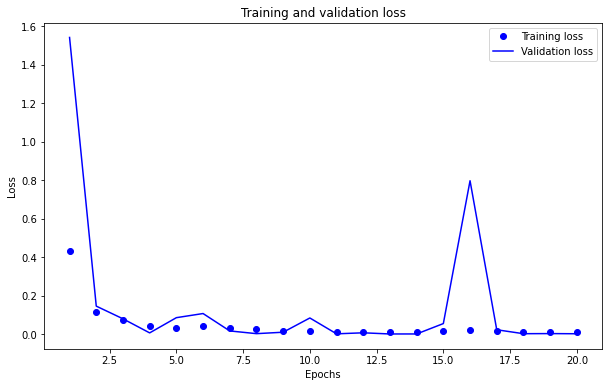

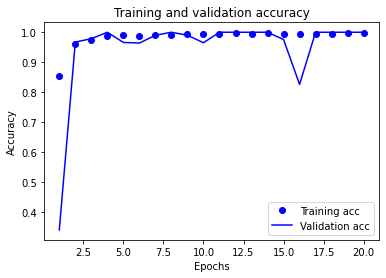

In [15]:
# Build our neural network model with LSTM

from keras import models
from keras import layers

max_features = 25000

from keras.layers import LSTM
model = models.Sequential()
model.add(layers.Embedding(max_features, 512))
model.add(layers.LSTM(512))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Iterate on your training data by calling the fit() method of your model
history = model.fit(X_train_res, y_train_res,
                    epochs=20,
                    batch_size=250,
                   validation_split=0.2)

# plot the results of loss values from the training set and validtion set
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.figure(figsize=(10,6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# plot the results of accuracy from the training set and validtion set
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Performance on training set

In [16]:
preds_Y_train = model.predict(X_train)
preds_Y_train =(preds_Y_train>0.5).astype(int)

preds_Y_train = enc.inverse_transform(preds_Y_train)
y_train = enc.inverse_transform(y_train)

accuracy = accuracy_score(y_train, preds_Y_train)
precision = precision_score(y_train, preds_Y_train,average=None) # average=None: The precision scores for each class are returned
recall = recall_score(y_train, preds_Y_train,average=None)
f1 = f1_score(y_train, preds_Y_train,average=None)
c_matrix = confusion_matrix(y_train, preds_Y_train,labels=[-3,-2,-1,0,1,2,3])
print('accuracy: '+str(accuracy)+'\n')
print('precision: '+str(precision)+'\n')
print('recall: '+str(recall)+'\n')
print('F1 score: '+str(f1)+'\n')
print('Confusion matrix: ')
print(c_matrix)

accuracy: 0.9932496572091551

precision: [0.98648649 0.98116761 0.99811809 0.99122677 0.98629174 0.98701299
 1.        ]

recall: [1.         1.         0.9917027  0.99166915 0.99964375 1.
 1.        ]

F1 score: [0.99319728 0.9904943  0.99490005 0.99144791 0.99292286 0.99346405
 1.        ]

Confusion matrix: 
[[ 219    0    0    0    0    0    0]
 [   0  521    0    0    0    0    0]
 [   2    5 8486   59    4    1    0]
 [   0    5   16 6666   35    0    0]
 [   1    0    0    0 2806    0    0]
 [   0    0    0    0    0   76    0]
 [   0    0    0    0    0    0   60]]


## Performance on testing set

In [17]:
preds_Y_test = model.predict(X_test)
preds_Y_test =(preds_Y_test>0.5).astype(int)

preds_Y_test = enc.inverse_transform(preds_Y_test)
y_test = enc.inverse_transform(y_test)

accuracy = accuracy_score(y_test, preds_Y_test)
precision = precision_score(y_test, preds_Y_test,average=None) # average=None: The precision scores for each class are returned
recall = recall_score(y_test, preds_Y_test,average=None)
f1 = f1_score(y_test, preds_Y_test,average=None)
c_matrix = confusion_matrix(y_test, preds_Y_test,labels=[-3,-2,-1,0,1,2,3])
print('accuracy: '+str(accuracy)+'\n')
print('precision: '+str(precision)+'\n')
print('recall: '+str(recall)+'\n')
print('F1 score: '+str(f1)+'\n')
print('Confusion matrix: ')
print(c_matrix)

accuracy: 0.8647964564437882

precision: [0.59459459 0.71       0.94       0.82472432 0.78463855 0.55555556
 1.        ]

recall: [0.81481481 0.6173913  0.93391867 0.85964912 0.71961326 0.55555556
 0.92307692]

F1 score: [0.6875     0.66046512 0.93694947 0.84182464 0.75072046 0.55555556
 0.96      ]

Confusion matrix: 
[[  44    1    4    3    0    2    0]
 [   8   71   23   12    1    0    0]
 [   3   16 2021  107   16    1    0]
 [  17    7   82 1421  123    3    0]
 [   2    4   17  178  521    2    0]
 [   0    1    2    2    3   10    0]
 [   0    0    1    0    0    0   12]]
